# Análise exploratória de dados

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Coleta de Dados
df = sns.load_dataset('diamonds')

# Salvando o arquivo em .csv na pasta data/raw
df.to_csv('../data/raw/data.csv', index=False)

## 1. Descrição dos dados

In [4]:
# Verificando as variáveis do df
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [5]:
# Verificando as 5 primeiras linhas
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
# Criando um dicionário sobre o df
dict = pd.DataFrame([
    {
     'variavel':'carat',
     'descricao':'Peso em quilates do diamante',
     'tipo':'quantitativa',
     'subtipo':'continua'
    },{
     'variavel':'cut',
     'descricao':'Qualidade de corte do diamente',
     'tipo':'qualitativa',
     'subtipo':'ordinal'
    },{
     'variavel':'color',
     'descricao':'Cor do diamente',
     'tipo':'qualitativa',
     'subtipo':'nominal'
    },{
     'variavel':'clarity',
     'descricao':'Clareza diz sobre quao claro é o diamente',
     'tipo':'qualitativa',
     'subtipo':'ordinal'
    },{
     'variavel':'depth',
     'descricao':'Porcentagem de profundidade total do diamente',
     'tipo':'quantitativa',
     'subtipo':'continua'
    },{
     'variavel':'table',
     'descricao':'Largura do topo do diamante em relação ao ponto mais largo',
     'tipo':'quantitativa',
     'subtipo':'continua'
    },{
     'variavel':'price',
     'descricao':'Valor do diamante em dólares',
     'tipo':'quantitativa',
     'subtipo':'discreta'
    },{
     'variavel':'x',
     'descricao':'Comprimento do diamente em milímetros',
     'tipo':'quantitativa',
     'subtipo':'continua'
    },{
     'variavel':'y',
     'descricao':'Largura do diamente em milímetros',
     'tipo':'quantitativa',
     'subtipo':'continua'
    },{
     'variavel':'z',
     'descricao':'Profundidade do diamente em milímetros',
     'tipo':'quantitativa',
     'subtipo':'continua'
    }   
])

dict

,variavel,descricao,tipo,subtipo
0,carat,Peso em quilates do diamante,quantitativa,continua
1,cut,Qualidade de corte do diamente,qualitativa,ordinal
2,color,Cor do diamente,qualitativa,nominal
3,clarity,Clareza diz sobre quao claro é o diamente,qualitativa,ordinal
4,depth,Porcentagem de profundidade total do diamente,quantitativa,continua
5,table,Largura do topo do diamante em relação ao pont...,quantitativa,continua
6,price,Valor do diamante em dólares,quantitativa,discreta
7,x,Comprimento do diamente em milímetros,quantitativa,continua
8,y,Largura do diamente em milímetros,quantitativa,continua
9,z,Profundidade do diamente em milímetros,quantitativa,continua


In [29]:
# Salvando o arquivo em .csv na pasta específica de arquivos
dict.to_csv('../data/external/dictionary.csv', index=False)

In [11]:
# Verificando a quantidade de variáveis e registros
df.shape

(53940, 10)

In [12]:
# Verificando as informações das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [13]:
# Verificando se existem informações duplicadas
df.loc[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


Pode-se verificar que existem alguns registros duplicados, mas eis a questão, são mesmo registros duplicados ou podem sim existir diamantes iguais?

In [9]:
# Verificando se existem valores nulos no df
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
# Realizando uma análise descritiva simples dos dados quantitativos
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Para as variáveis quantitativas podemos identificar algumas informações interessantes como:

    Peso (carat) - A média é de 0.79 quilates, mas com um desvio padrão de 0.47, o que pode ser considerado alto indicando uma variação significativa nos pesos.

    Percentual de profundidade (deth) e Largura do topo do diamante em relação ao ponto mais largo (table) - possuem uma certa normalidade nos dados.

    Preço (price) - Possui uma média de 3932.79 dolares, com um desvio padrão bastante alto, o que pode indicar uma variação significativa nos preços e talvez presença de outliers.

In [16]:
# Realizando uma análise descritiva simples dos dados qualitativos
df.describe(exclude=np.number)

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


Para as variáveis qualitativas podemos identificar algumas informações como:

    Qualidade do corte (cut) - Temos 5 tipos de classificação de qualidade onde o tipo Ideal é o que possui maior frequência entre os registros
    
    Cor (color) - Temos 7 tipos de classficação de cor onde a cor G é a que possui maior frequência entre os registros
    
    Clareza (clarity) - Temos 8 tipos de classificação de clareza, onde o tipo SI1 é o que possui maior frequência entre os registros

In [17]:
df.corr()

/tmp/ipykernel_418/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


## 2. Perguntas de partida e hipóteses

#### Hipótese 1: Existe uma relação entre o peso do diamante (carat) e seu preço (price)?

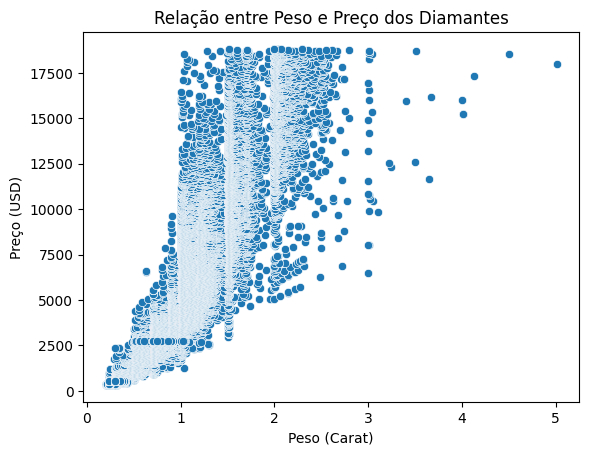

In [20]:
# Plot do gráfico para conferir a relação entre o peso do diamente e seu preço
sns.scatterplot(x='carat', y='price', data=df)
plt.title('Relação entre Peso e Preço dos Diamantes')
plt.xlabel('Peso (Carat)')
plt.ylabel('Preço (USD)')
plt.show()

#### Hipótese 2: Qual é a distribuição dos preços dos diamantes em relação à qualidade do corte (cut)?

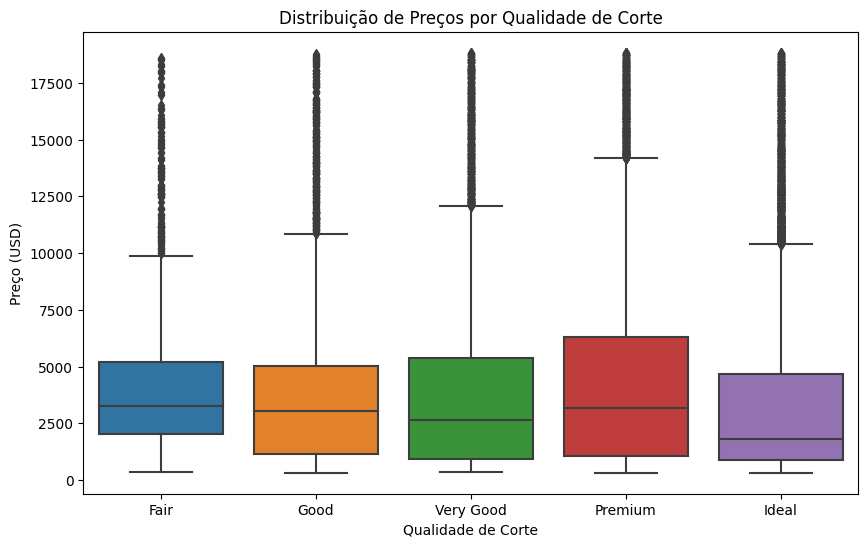

In [22]:
# Plot do gráfico para conferir a relação entre o preço do diamente e sua qualidade
plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=df, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title('Distribuição de Preços por Qualidade de Corte')
plt.xlabel('Qualidade de Corte')
plt.ylabel('Preço (USD)')
plt.show()

#### Hipótese 3: Existe uma correlação entre a cor do diamante (color) e sua clareza (clarity)?

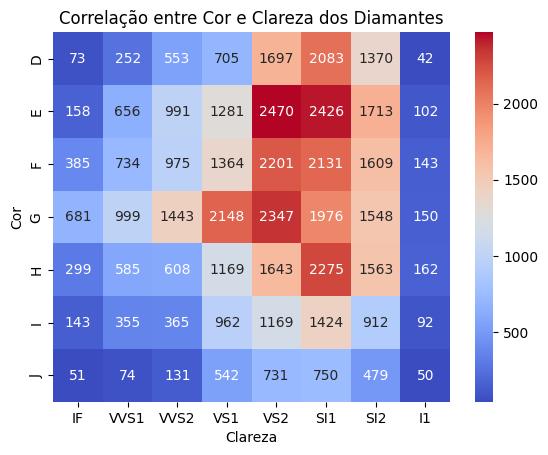

In [24]:
# Plot do gráfico de correlação entre cor e clareza
sns.heatmap(df.groupby(['color', 'clarity']).size().unstack(), cmap='coolwarm', annot=True, fmt='d')
plt.title('Correlação entre Cor e Clareza dos Diamantes')
plt.xlabel('Clareza')
plt.ylabel('Cor')
plt.show()

#### Hipótese 4: Quais são as características dos diamantes mais caros?

In [27]:
# Plot do gráfico das características dos top 10 diamentes mais caros
most_expensive = df.nlargest(10, 'price')
print("Características dos 10 diamantes mais caros:")
print(most_expensive[['carat', 'cut', 'color', 'clarity', 'price']])

Características dos 10 diamantes mais caros:
       carat        cut color clarity  price
27749   2.29    Premium     I     VS2  18823
27748   2.00  Very Good     G     SI1  18818
27747   1.51      Ideal     G      IF  18806
27746   2.07      Ideal     G     SI2  18804
27745   2.00  Very Good     H     SI1  18803
27744   2.29    Premium     I     SI1  18797
27742   2.04    Premium     H     SI1  18795
27743   2.00    Premium     I     VS1  18795
27740   1.71    Premium     F     VS2  18791
27741   2.15      Ideal     G     SI2  18791


## 3. Insights

#### 1. Relação entre Peso e Preço: Observamos uma forte correlação positiva entre o peso do diamante e seu preço.
#### 2. Distribuição de Preços por Qualidade de Corte: Os diamantes com corte "Ideal" tendem a ter preços mais altos.
#### 3. Correlação entre Cor e Clareza: Não encontramos uma correlação significativa entre cor e clareza.
#### 4. Características dos Diamantes Mais Caros: Os diamantes mais caros tendem a ter pesos mais altos, cortes de qualidade superior e maior clareza.